
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 118 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Case, Result
dbl (1): Runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 118 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Case, Result
dbl (1): Runtime

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


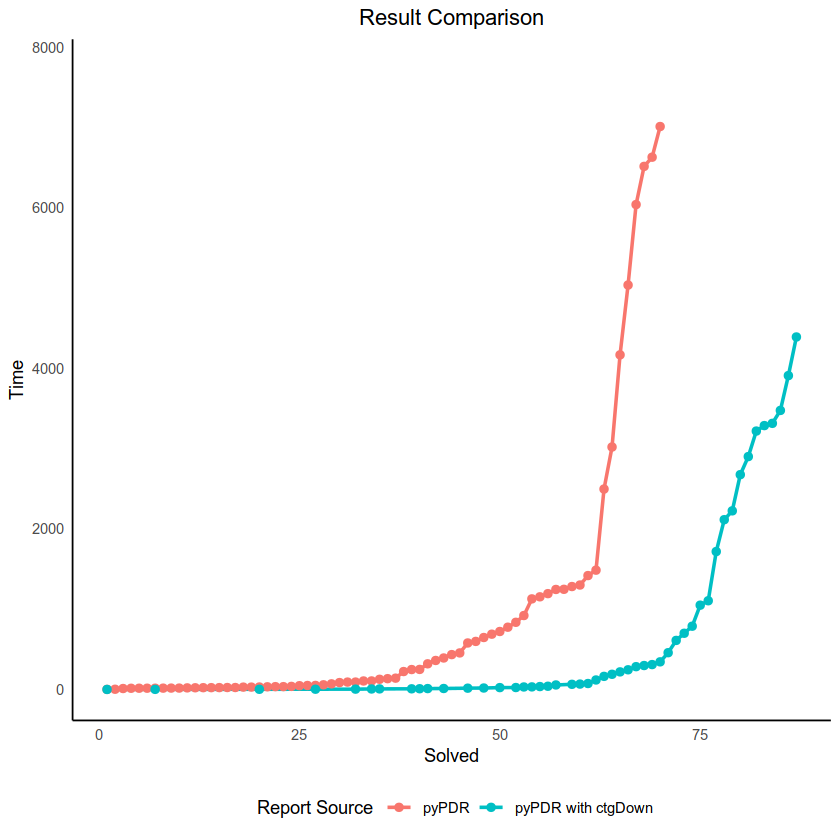

In [2]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(readr) # for read_csv, which is similar to read.csv but faster and with additional features

# Define the file paths
file_path1 <- '../logs/report_down.csv'
file_path2 <- '../logs/report_down_innards.csv'

# Read the CSV files
data1 <- read_csv(file_path1)
data2 <- read_csv(file_path2)

# Add an identifier for each report
data1$Report <- 'pyPDR with ctgDown'
data2$Report <- 'pyPDR'

# Combine the two datasets
combined_data <- rbind(data1, data2)

# Filter out rows where Result is "Error" and "Timeout"
filtered_combined_data <- combined_data %>%
  filter(Result != "Error" & Result != "Timeout")

# Create a new data frame with unique time thresholds, cumulative counts, and distinguishing by Report
threshold_combined_data <- filtered_combined_data %>%
  arrange(Report, Runtime) %>%
  group_by(Report) %>%
  mutate(CumulativeCount = 1:n()) %>%
  distinct(Report, Runtime, .keep_all = TRUE) %>%
  ungroup() # To make sure the next operations are applied to the whole dataset

# Create a plot
plot <- ggplot(threshold_combined_data, aes(x = CumulativeCount, y = Runtime, color = Report)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  labs(title = "Result Comparison",
       x = "Solved",
       y = "Time",
       color = "Report Source") +
  theme_minimal() +
  theme(
    plot.title = element_text(hjust = 0.5),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(colour = "black"),
    legend.position = "bottom"
  ) +
  scale_y_continuous(limits = c(0, max(threshold_combined_data$Runtime) * 1.1))

# Display the plot
print(plot)

                       Case Runtime_x    Result_x Runtime_y    Result_y
3         cmu.gigamax.B.aag         1   FOUND INV     15.55   FOUND INV
11         eijk.S1196.S.aag         1   FOUND INV     19.65   FOUND INV
12         eijk.S1238.S.aag         1   FOUND INV     22.20   FOUND INV
14          eijk.S208.S.aag         8   FOUND INV     85.79   FOUND INV
15         eijk.S208c.S.aag         6   FOUND INV     24.05   FOUND INV
16         eijk.S208o.S.aag         2   FOUND INV     11.63   FOUND INV
17          eijk.S298.S.aag        67   FOUND INV   2496.64   FOUND INV
18          eijk.S344.S.aag       298   FOUND INV   6040.51   FOUND INV
19          eijk.S349.S.aag       284   FOUND INV   5037.97   FOUND INV
21          eijk.S386.S.aag        11   FOUND INV    106.15   FOUND INV
27          eijk.S641.S.aag         2   FOUND INV     17.16   FOUND INV
28          eijk.S713.S.aag         3   FOUND INV     15.32   FOUND INV
29          eijk.S820.S.aag        31   FOUND INV    392.05   FO

Warning message in scale_x_continuous(trans = "log10", limits = c(0.01, 10000), :
“log-10 transformation introduced infinite values.”


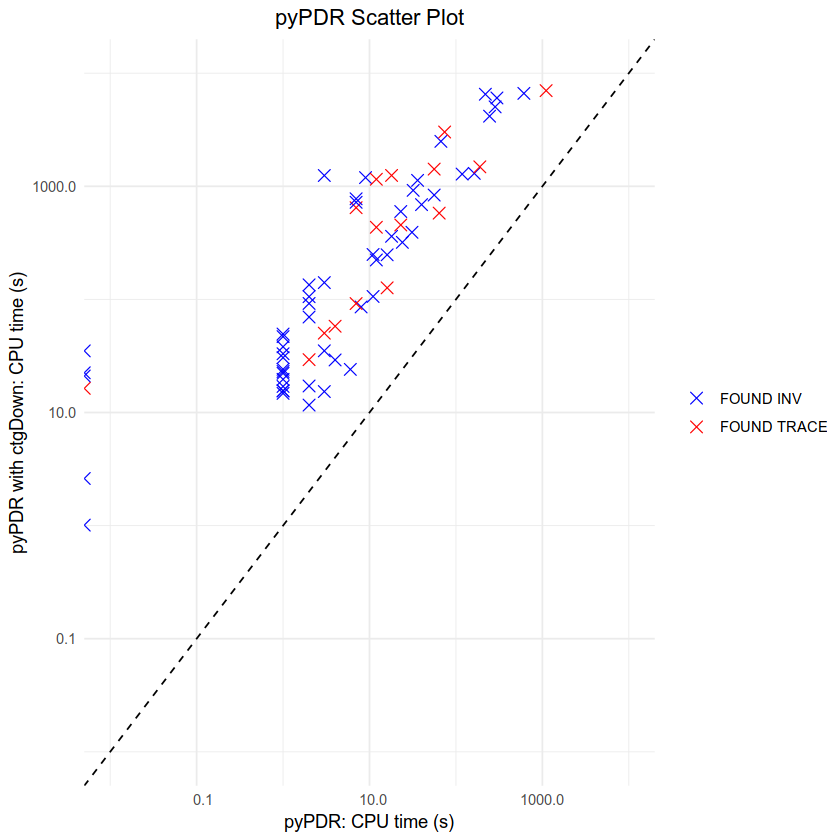

In [1]:
# Install and load required libraries
#install.packages("ggplot2")
library(ggplot2)

# Read in the CSV files
df1 <- read.csv("../logs/report_down.csv")
df2 <- read.csv("../logs/report_down_innards.csv")

# Merge the data frames on the 'Case' column
merged_df <- merge(df1, df2, by = "Case", suffixes = c("_x", "_y"))

# Filter the merged data frame
filtered_df <- subset(merged_df, (Result_x == "FOUND INV" | Result_x == "FOUND TRACE") &
                                 (Result_y == "FOUND INV" | Result_y == "FOUND TRACE") &
                                 (Result_x == Result_y))

# print the filtered data frame
print(filtered_df)
# Create the scatter plot using ggplot2
scatter_plot <- ggplot(filtered_df, aes(x = Runtime_x, y = Runtime_y, color = Result_x)) +
  geom_point(shape = 4, size = 3) +  # Use 'x' marker
  scale_x_continuous(trans = "log10", limits = c(0.01, 10000),
                     labels = function(x) format(x, scientific = FALSE)) +
  scale_y_continuous(trans = "log10", limits = c(0.01, 10000),
                     labels = function(x) format(x, scientific = FALSE)) +
  geom_abline(intercept = 0, slope = 1, linetype = "dashed") +  # Add diagonal line
  labs(x = "pyPDR: CPU time (s)", y = "pyPDR with ctgDown: CPU time (s)",
       title = "pyPDR Scatter Plot") +
  scale_color_manual(values = c("FOUND INV" = "blue", "FOUND TRACE" = "red")) +  # Set color based on Result_x
  theme_minimal() +
  theme(plot.title = element_text(hjust = 0.5),
        legend.title = element_blank())  # Remove legend title

# Display the plot
print(scatter_plot)

In [14]:
# Load raw input by reading the CSV file
raw_input <- readLines("../logs/pdr_log_2024-06-02-21:03:46.csv")

# Split the raw input into lines
lines <- unlist(strsplit(raw_input, "\n"))

# Split each line into its components and transform to a data frame
entries_list <- lapply(lines, function(line) {
  components <- unlist(strsplit(line, ","))
  # This assumes that the first two components are always present and the rest follow a predictable pattern.
  data.frame(time = components[1], metric = components[2], value = components[3], stringsAsFactors = FALSE)
})

# Combine the data frames vertically
library(dplyr)
entries_df <- bind_rows(entries_list)

# Create unique identifiers for duplicates
entries_df <- entries_df %>%
  group_by(time, metric) %>%
  mutate(duplicate_id = row_number()) %>%
  ungroup()

# Spread the metrics into separate columns
library(tidyr)
entries_wide <- entries_df %>%
  pivot_wider(names_from = metric, values_from = value)

# Export the data frame to a new CSV file
write.csv(entries_wide, file = "../logs/pdr_log_2024-06-02-21:03:46_processed.csv", row.names = FALSE)